In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

In [2]:
tips = sns.load_dataset("tips")

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Functions to draw linear regression models
- Two main functions :  regplot() and lmplot(). Closely related, and share much of their core functionality.
- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

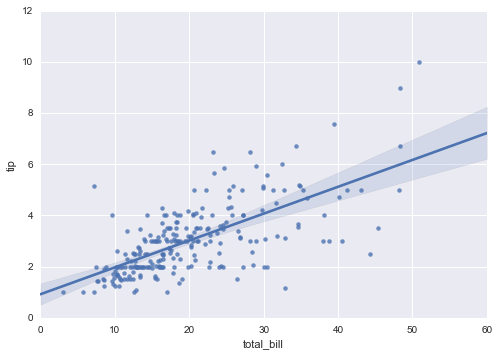

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips)

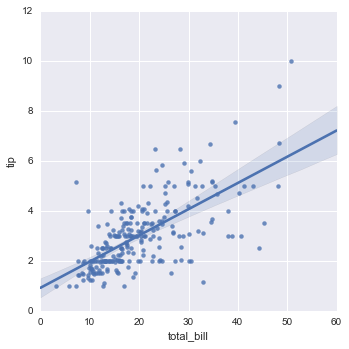

In [11]:
sns.lmplot(x="total_bill", y="tip", data=tips)

- regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. 
- In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. 
- Other than this input flexibility, regplot() possesses a subset of lmplot()‘s features

## With categorical variable 

In [ ]:
sns.lmplot(x="size", y="tip", data=tips)

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## Fitting different kinds of models
- There are a number of mutually exclusive options for estimating the regression model: order, logistic, lowess, robust, and logx.

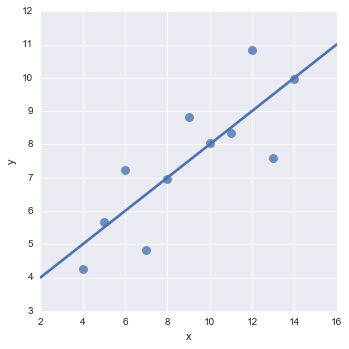

In [12]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 80})

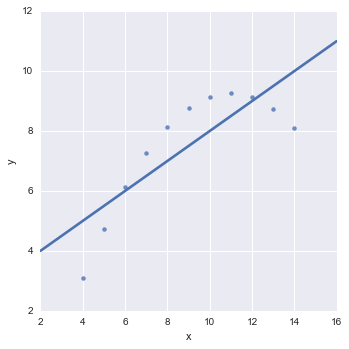

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

- For higher order relationships / polynomical regression

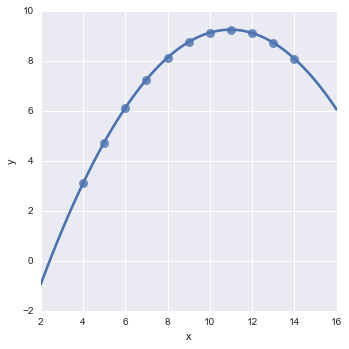

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

- In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals

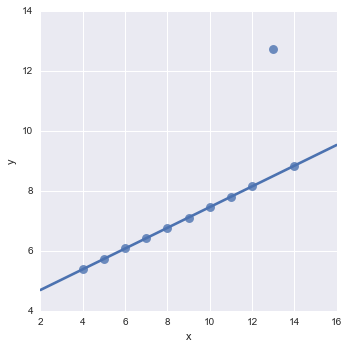

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

 - When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x

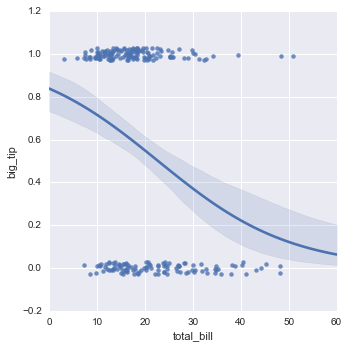

In [19]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

- An altogether different approach is to fit a nonparametric regression using a lowess smoother. Computationally intensive doesn't compute confidence interval

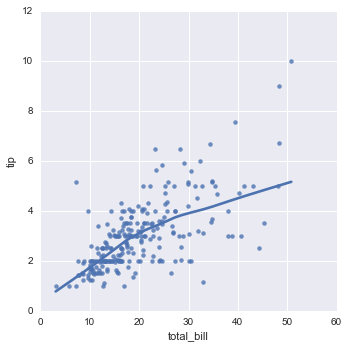

In [20]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

## Residual plot
- The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

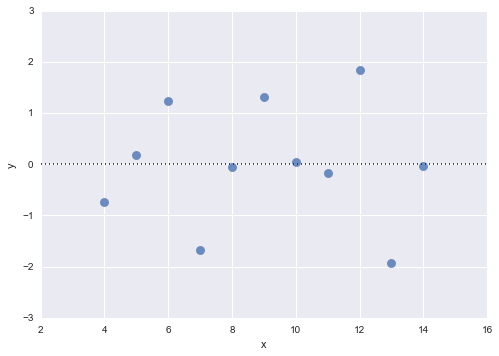

In [21]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

- If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

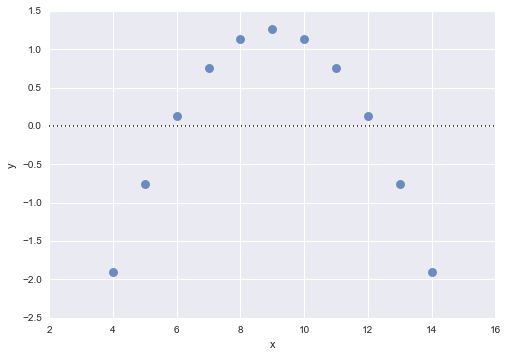

In [22]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## The difference
-  While regplot() always shows a single relationsihp, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to **three** additional categorical variables.

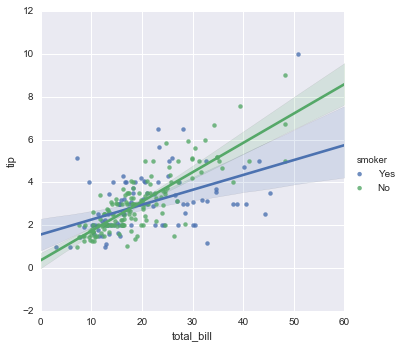

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

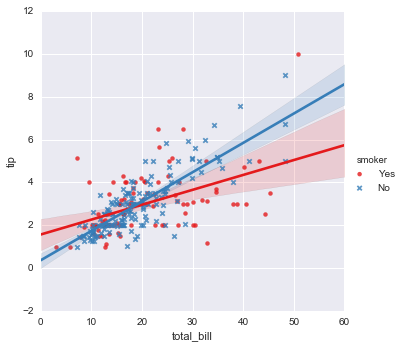

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

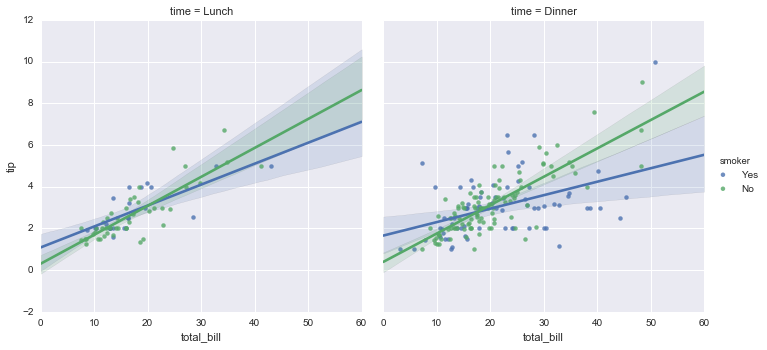

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

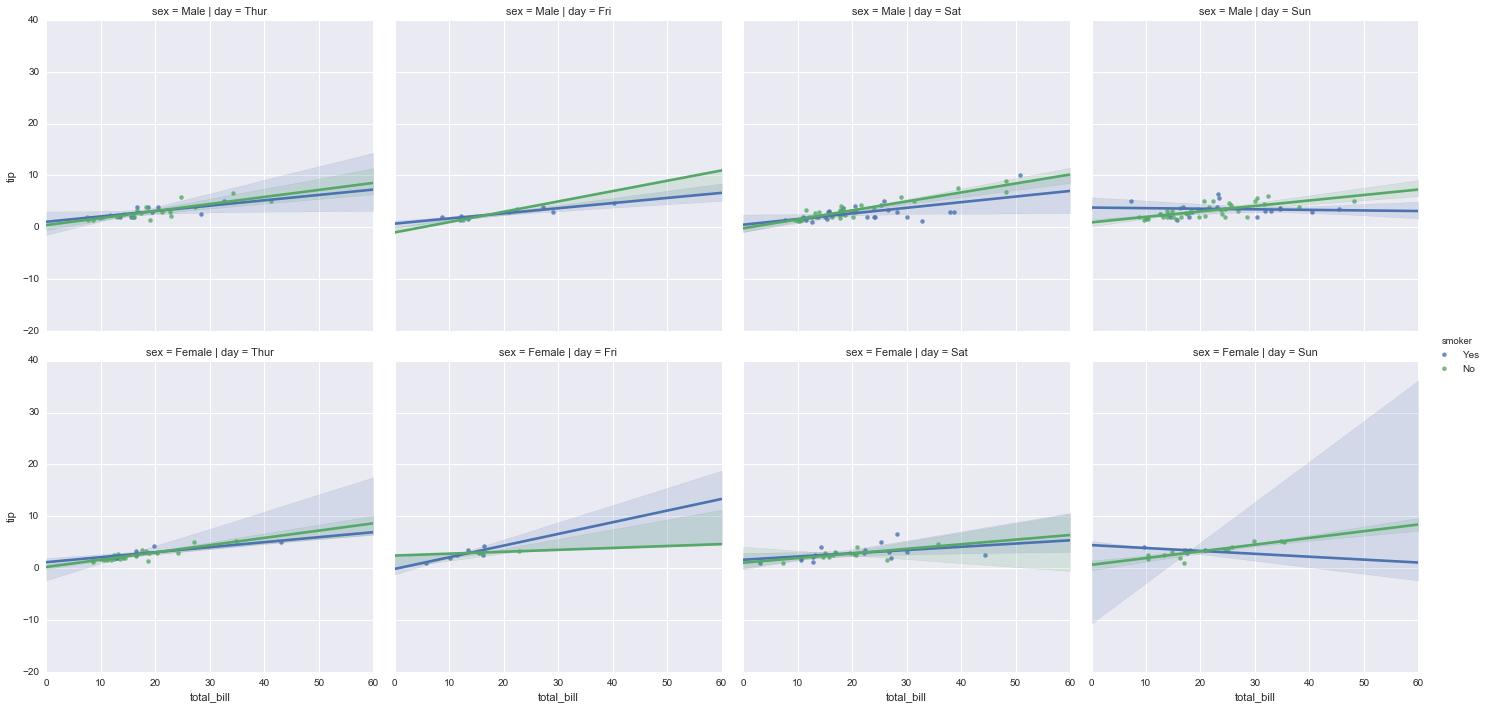

In [29]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="day", row="sex", data=tips)

## Difference in size
- Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because func:regplot is an “axes-level” function draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. If no axes is provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself
- In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself

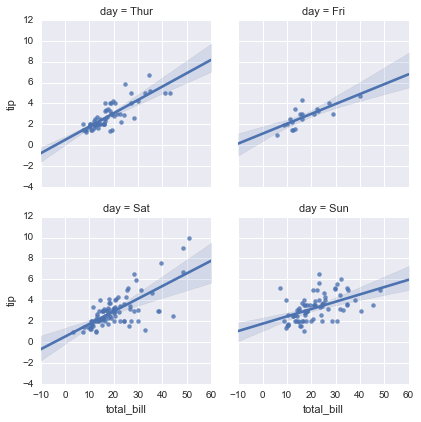

In [30]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3)

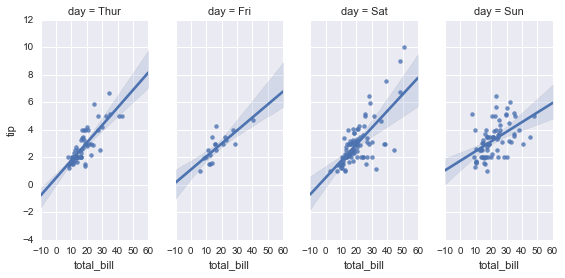

In [35]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.5, size=4)

## Plotting regression in other context
- PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset
- Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter

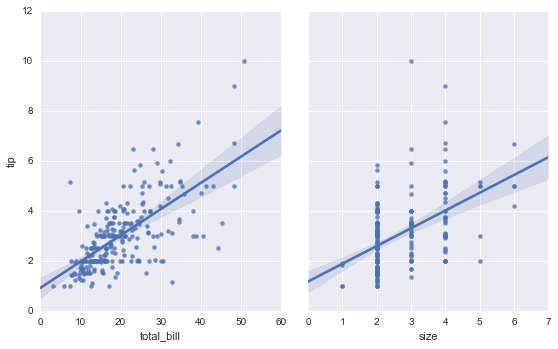

In [36]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg")

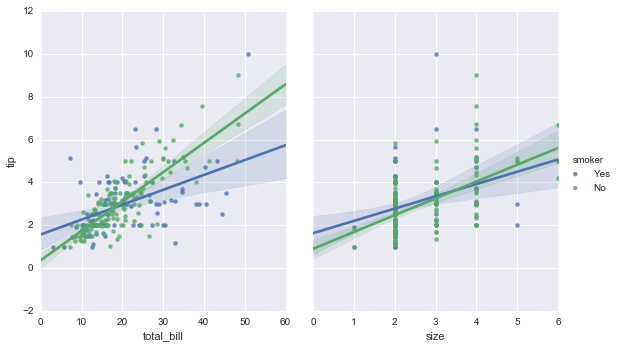

In [37]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg")